In [57]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("nifty_fifty_data.csv")
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,03-APR-2024,22385.70,22521.1,22346.50,22434.65,309647491.0,30793.28
1,04-APR-2024,22592.10,22619.0,22303.80,22514.65,400986156.0,40705.56
2,05-APR-2024,22486.40,22537.6,22427.60,22513.70,242244731.0,24797.82
3,08-APR-2024,22578.35,22697.3,22550.35,22666.30,227633561.0,22480.20
4,09-APR-2024,22765.10,22768.4,22612.25,22642.75,232356772.0,21651.69


In [58]:
# Drop na values
df.dropna(inplace=True)
df.shape

(248, 7)

In [59]:
# Adding column for profit(P) or loss(L) that day and its value
df['PoL_Value'] = df['Open '] - df['Close ']
df['PoL'] = df['PoL_Value'].apply(lambda x: 'P' if x > 0 else 'L')

df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),PoL_Value,PoL
0,03-APR-2024,22385.70,22521.1,22346.50,22434.65,309647491.0,30793.28,-48.95,L
1,04-APR-2024,22592.10,22619.0,22303.80,22514.65,400986156.0,40705.56,77.45,P
2,05-APR-2024,22486.40,22537.6,22427.60,22513.70,242244731.0,24797.82,-27.30,L
3,08-APR-2024,22578.35,22697.3,22550.35,22666.30,227633561.0,22480.20,-87.95,L
4,09-APR-2024,22765.10,22768.4,22612.25,22642.75,232356772.0,21651.69,122.35,P


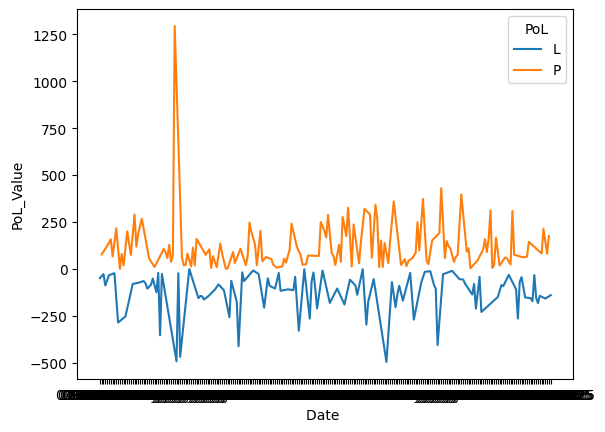

In [60]:
sns.lineplot(x = 'Date ', y = 'PoL_Value', data = df, hue = 'PoL')
plt.show()

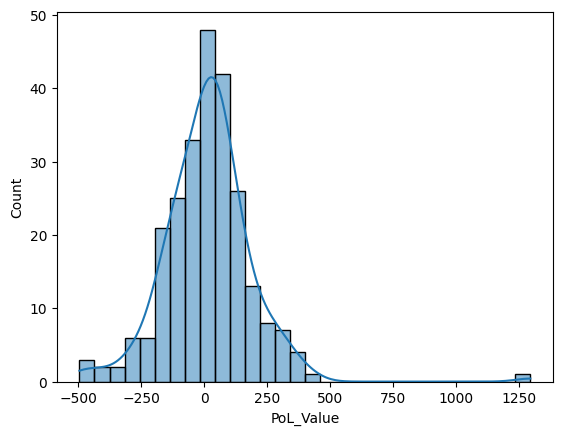

In [61]:
sns.histplot(df['PoL_Value'], bins = 30, kde=True)
plt.show()

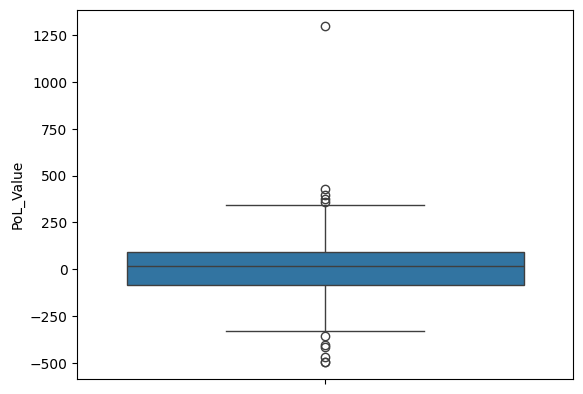

In [62]:
sns.boxplot(df['PoL_Value'])
plt.show()

In [63]:
# Average daily returns
df['PoL_Value'].mean() # ~ 14Cr approx

np.float64(14.086895161290393)

In [64]:
confidence_level = 0.95
std = df['PoL_Value'].std()
moe = confidence_level * (std / np.sqrt(len(df['PoL_Value'])))
sample_mean = df['PoL_Value'].mean()

low = sample_mean - moe
high = sample_mean + moe

print(low)
print(high)

3.5199132017325923
24.653877120848193


In [70]:
# Try again with removed outliers (we will use z-score here)

df['PoL_Value_ZScore'] = np.abs(stats.zscore(df['PoL_Value']))
df_filtered = df.where(df['PoL_Value_ZScore'] < 3)

# re-calculate the CI

confidence_level = 0.95
std = df_filtered['PoL_Value'].std()
moe = confidence_level * (std / np.sqrt(len(df_filtered['PoL_Value'])))
sample_mean = df_filtered['PoL_Value'].mean()

low = sample_mean - moe
high = sample_mean + moe

print(low)
print(high)

-0.4662218698043379
18.268246161302457


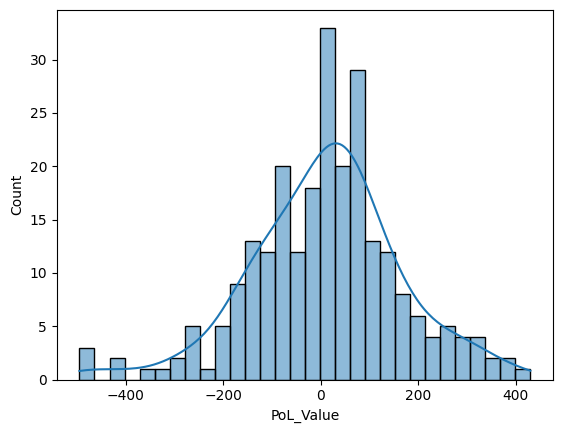

In [72]:
sns.histplot(df_filtered['PoL_Value'], bins = 30, kde=True)
plt.show() # This is much better destributed now and will tend to give better predictions